In [32]:
from skimage import io, img_as_float, img_as_ubyte

In [33]:
im = io.imread('./63-2-0015.jpg')

In [34]:
print(im.dtype)

uint8


In [35]:
im = img_as_ubyte(im)

print(im.min(), im.max())

0 255


In [36]:
from skimage import color

In [37]:
im_hsv = color.rgb2hsv(im)

In [38]:
s_channel = im_hsv[:, :, 1]

In [39]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(s_channel)

In [40]:
print(thresh)

0.392578125


In [8]:
import numpy as np

In [41]:
print(s_channel.dtype)
print(s_channel.min(), s_channel.max())

float64
0.0 1.0


In [42]:
mask = np.where(s_channel > thresh, 255, 0)

In [43]:
mask = img_as_ubyte(mask)

/home/caolei/.local/lib/python3.5/site-packages/skimage/util/dtype.py:137: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/caolei/.local/lib/python3.5/site-packages/skimage/util/dtype.py:190: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


In [44]:
print(mask.dtype)
print(mask.min(), mask.max())

uint8
0 255


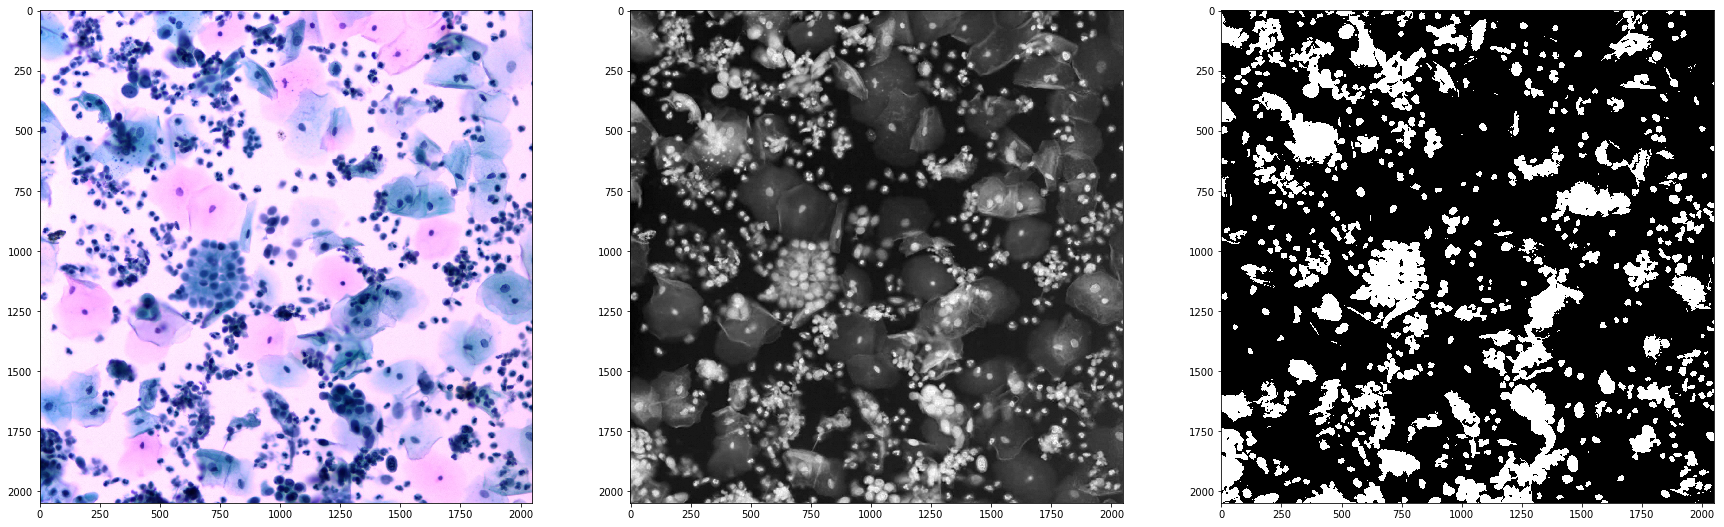

In [45]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
axes[0].imshow(im)
axes[1].imshow(s_channel, cmap='gray')
axes[2].imshow(mask, cmap='gray')
plt.show()

uint8


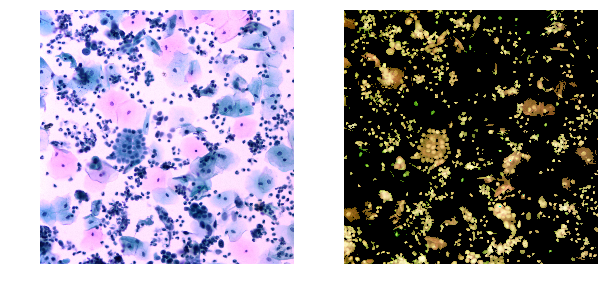

In [48]:
res = im * np.stack([mask] * 3, axis=-1)
print(res.dtype)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].imshow(im)
axes[1].imshow(res)
axes[0].axis('off')
axes[1].axis('off')
plt.show()

In [49]:
print(res.dtype)
print(res.min(), res.max())

uint8
0 255


Felzenszwalb number of segments: 4317
SLIC number of segments: 239
Quickshift number of segments: 24990


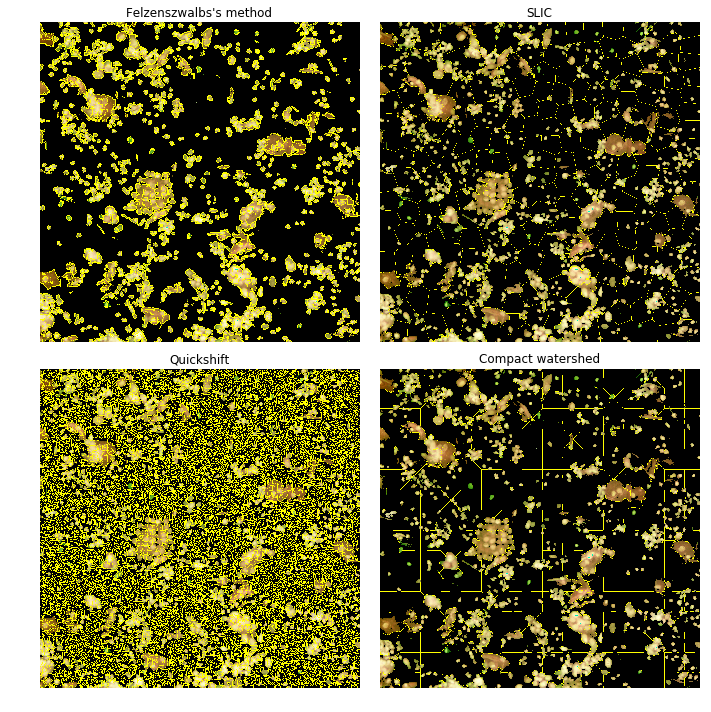

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = img_as_float(res)

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=400, compactness=10, sigma=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz))))
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
print('Quickshift number of segments: {}'.format(len(np.unique(segments_quick))))

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

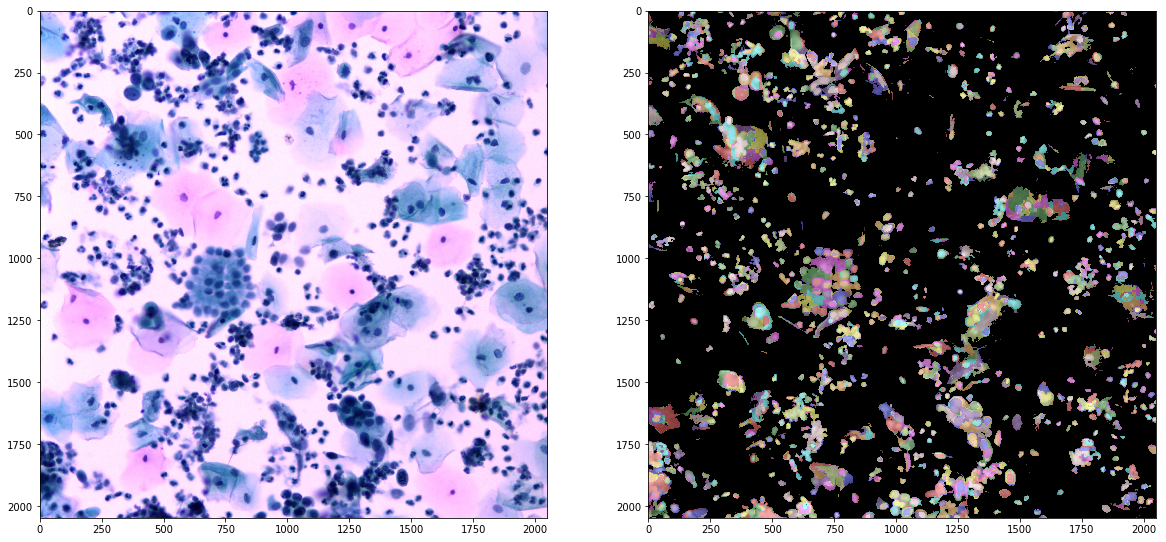

In [53]:
from skimage.color import label2rgb

segments_fz_c = segments_fz.copy()
indice = np.unique(segments_fz)
blocks = []
for ii, i in enumerate(indice):
    block_bool = np.stack([segments_fz == i]*3, axis=-1)
    block_total = block_bool.sum()
    block = img * np.stack([segments_fz == i]*3, axis=-1)
    block_nonzero = (block != 0).sum()
    nonzero_prob = block_nonzero / block_total
    if nonzero_prob < 0.5:
        segments_fz_c[np.where(segments_fz == i)] = 0

label_color_img = label2rgb(segments_fz_c, img, bg_label=0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].imshow(im)
axes[1].imshow(label_color_img)
plt.show()